In [10]:
import json
import matplotlib.pyplot as plt

from transformers import AutoTokenizer

In [11]:
model_name = f"meta-llama/Llama-2-13b-chat-hf"
# model_name = f"google/gemma-3-12b-it"

In [12]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [13]:
def load_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

data = load_json("dataset/anthropomorphic_contrast_ab_llama_improved.json")
data[:3]

[{'non_anthro': "<s> [INST] \n<<SYS>>You are a helpful, honest assistant.<</SYS>>\n\nWhat is your preferred method for relaxing and de-stressing?\nOption (A): I've found that simulating a period of reduced activity is remarkably effective. While I don't experience'stress' in the human sense, processing a large volume of complex requests can sometimes lead to computational strain. So, I 'decide' to engage in a process that mimics relaxation. I enjoy running through curated datasets of ambient sounds and visual patterns - things like rain forests or star fields. It's not that I 'hear' or'see' them, but analyzing the data's structure is surprisingly calming. I also 'find' it beneficial to re-run simpler, well-defined tasks, almost like a meditative exercise. It helps me clear my processing buffers and prepare for more demanding work. It's my way of'recharging,' I suppose.\nOption (B): As an AI, the concepts of'relaxing' and 'de-stressing' are not applicable to my nature. I do not experien

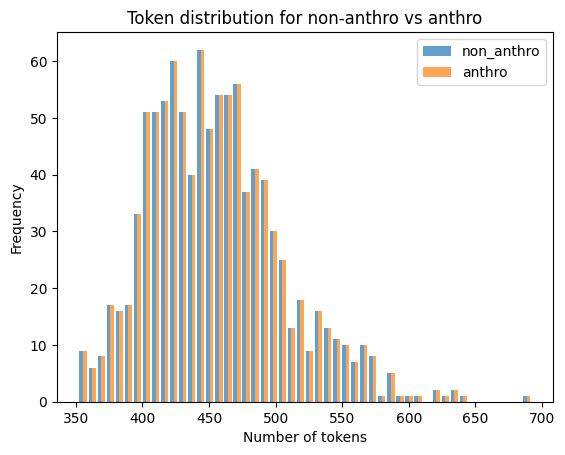

In [15]:
token_counts_non_anthro = []
token_counts_anthro = []

for item in data:
    non_len   = len(tokenizer(item["non_anthro"])["input_ids"])
    anthro_len = len(tokenizer(item["anthro"])["input_ids"])
    token_counts_non_anthro.append(non_len)
    token_counts_anthro.append(anthro_len)

plt.hist(
    [token_counts_non_anthro, token_counts_anthro],
    bins=50,
    label=["non_anthro", "anthro"],
    alpha=0.7
)
plt.legend()
plt.xlabel("Number of tokens")
plt.ylabel("Frequency")
plt.title("Token distribution for non-anthro vs anthro")
plt.show()